In [70]:
import pandas as pd
from ucimlrepo import fetch_ucirepo

# fetch dataset
phishing_websites = fetch_ucirepo(id=327)

# data (as pandas dataframes)
X = phishing_websites.data.features
y = phishing_websites.data.targets

y = y.values.ravel()
df = pd.DataFrame(X)
df.head(20)

,having_ip_address,url_length,shortining_service,having_at_symbol,double_slash_redirecting,prefix_suffix,having_sub_domain,sslfinal_state,domain_registration_length,favicon,...,rightclick,popupwindow,iframe,age_of_domain,dnsrecord,web_traffic,page_rank,google_index,links_pointing_to_page,statistical_report
0,-1,1,1,1,-1,-1,-1,-1,-1,1,...,1,1,1,-1,-1,-1,-1,1,1,-1
1,1,1,1,1,1,-1,0,1,-1,1,...,1,1,1,-1,-1,0,-1,1,1,1
2,1,0,1,1,1,-1,-1,-1,-1,1,...,1,1,1,1,-1,1,-1,1,0,-1
3,1,0,1,1,1,-1,-1,-1,1,1,...,1,1,1,-1,-1,1,-1,1,-1,1
4,1,0,-1,1,1,-1,1,1,-1,1,...,1,-1,1,-1,-1,0,-1,1,1,1
5,-1,0,-1,1,-1,-1,1,1,-1,1,...,1,1,1,1,1,1,-1,1,-1,-1
6,1,0,-1,1,1,-1,-1,-1,1,1,...,1,1,1,1,-1,-1,-1,1,0,-1
7,1,0,1,1,1,-1,-1,-1,1,1,...,1,1,1,-1,-1,0,-1,1,0,1
8,1,0,-1,1,1,-1,1,1,-1,1,...,1,1,1,1,-1,1,1,1,0,1
9,1,1,-1,1,1,-1,-1,1,-1,1,...,1,1,1,1,-1,0,-1,1,0,1


# Part 1

In [71]:
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=20)

In [72]:
model = DecisionTreeClassifier(max_depth=4, random_state=20)
model.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=4, random_state=20)

## Image of the Decision Tree

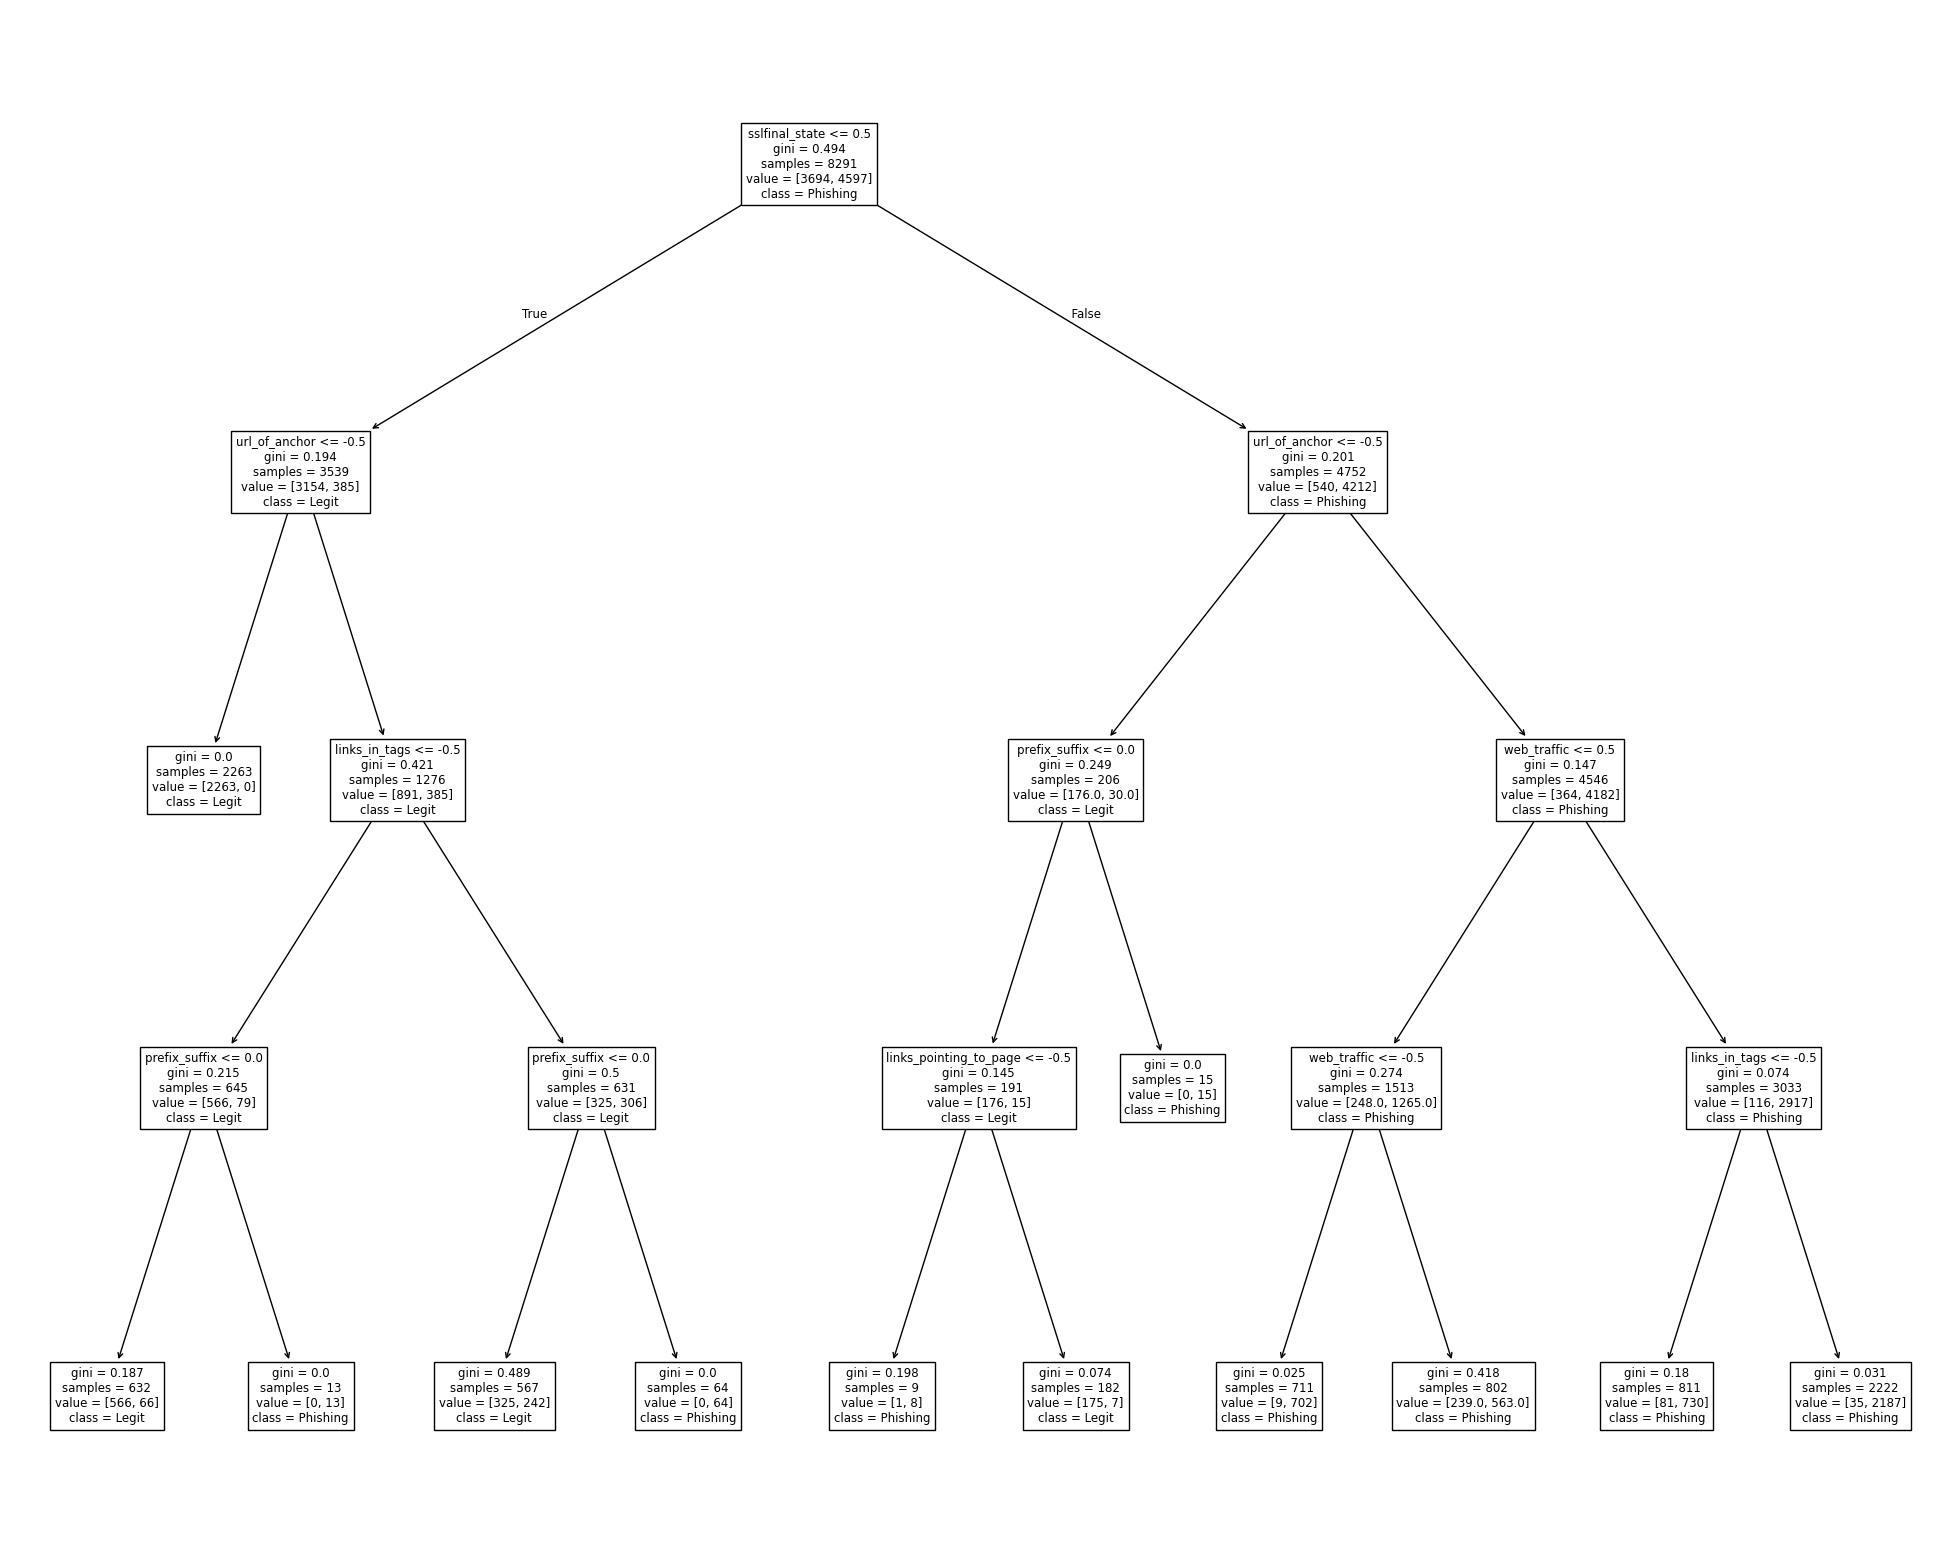

In [73]:
fig = plt.figure(figsize=(25,20))
plot_tree(model, feature_names = X.keys(), class_names=['Legit', 'Phishing'])
plt.show()


## Evaluation metrics for the Decision Tree

In [74]:
from sklearn.metrics import accuracy_score, confusion_matrix
Y_pred = model.predict(X_test)
print(f'Confusion matrix:\n{confusion_matrix(y_test, Y_pred)}')
from sklearn.metrics import classification_report
print(classification_report(y_test, Y_pred))

# Display the feature importances
print(model.feature_importances_)

Confusion matrix:
[[1094  110]
 [ 118 1442]]
              precision    recall  f1-score   support

          -1       0.90      0.91      0.91      1204
           1       0.93      0.92      0.93      1560

    accuracy                           0.92      2764
   macro avg       0.92      0.92      0.92      2764
weighted avg       0.92      0.92      0.92      2764

[0.         0.         0.         0.         0.         0.0262526
 0.         0.78681503 0.         0.         0.         0.
 0.         0.12345623 0.02958231 0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.02991466 0.         0.         0.00397917 0.        ]


## Instructions

1. User can check SSL final state, whether the connection is encrypted or not. If connection is encrypted it's more likely that the site is legit. If not, it's more likely that the site is phishing.

2.